In [14]:
import torch
import torch.nn as nn

import string

In [417]:
!wget "https://raw.githubusercontent.com/amephraim/nlp/master/texts/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt"

--2022-03-15 22:53:23--  https://raw.githubusercontent.com/amephraim/nlp/master/texts/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439742 (429K) [text/plain]
Saving to: ‘J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt’

J. K. Rowling - Har 100%[===================>] 429.44K  1.27MB/s    in 0.3s    

2022-03-15 22:53:24 (1.27 MB/s) - ‘J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt’ saved [439742/439742]



In [592]:
with open("J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt", 'r') as f:
  strings = f.readlines()
sample_text = "".join(strings).replace('\n', ' ').replace('Mr.', 'mr').replace('Mrs.', 'mrs').split('. ')
# short_text = sample_text[:200]
# short_text

In [244]:
sample_text = '''

'''
sample_text = sample_text.replace('\n', '. ').split('. ')

In [45]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/teo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
[word_tokenize(sentence) for sentence in sample_text] 

[[],
 ['Gustav',
  'Mahler',
  '(',
  'German',
  ':',
  '[',
  'ˈmaːlɐ',
  ']',
  ';',
  '7',
  'July',
  '1860',
  '–',
  '18',
  'May',
  '1911',
  ')',
  'was',
  'an',
  'Austro-Bohemian',
  'Romantic',
  'composer',
  ',',
  'and',
  'one',
  'of',
  'the',
  'leading',
  'conductors',
  'of',
  'his',
  'generation'],
 ['As',
  'a',
  'composer',
  'he',
  'acted',
  'as',
  'a',
  'bridge',
  'between',
  'the',
  '19th-century',
  'Austro-German',
  'tradition',
  'and',
  'the',
  'modernism',
  'of',
  'the',
  'early',
  '20th',
  'century'],
 ['While',
  'in',
  'his',
  'lifetime',
  'his',
  'status',
  'as',
  'a',
  'conductor',
  'was',
  'established',
  'beyond',
  'question',
  ',',
  'his',
  'own',
  'music',
  'gained',
  'wide',
  'popularity',
  'only',
  'after',
  'periods',
  'of',
  'relative',
  'neglect',
  ',',
  'which',
  'included',
  'a',
  'ban',
  'on',
  'its',
  'performance',
  'in',
  'much',
  'of',
  'Europe',
  'during',
  'the',
  'Nazi',


In [593]:
def make_tokenized_corpus(corpus):
  out= [ [y.lower() for y in remove_punctuation(sentence).split(' ') if y] for sentence in corpus]
  return [x for x in out if x!=[]]
corpus = make_tokenized_corpus(sample_text)
corpus

[['harry',
  'potter',
  'and',
  'the',
  'sorcerers',
  'stone',
  'chapter',
  'one',
  'the',
  'boy',
  'who',
  'lived',
  'mr',
  'and',
  'mrs',
  'dursley',
  'of',
  'number',
  'four',
  'privet',
  'drive',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they',
  'were',
  'perfectly',
  'normal',
  'thank',
  'you',
  'very',
  'much'],
 ['they',
  'were',
  'the',
  'last',
  'people',
  'youd',
  'expect',
  'to',
  'be',
  'involved',
  'in',
  'anything',
  'strange',
  'or',
  'mysterious',
  'because',
  'they',
  'just',
  'didnt',
  'hold',
  'with',
  'such',
  'nonsense'],
 ['mr',
  'dursley',
  'was',
  'the',
  'director',
  'of',
  'a',
  'firm',
  'called',
  'grunnings',
  'which',
  'made',
  'drills'],
 ['he',
  'was',
  'a',
  'big',
  'beefy',
  'man',
  'with',
  'hardly',
  'any',
  'neck',
  'although',
  'he',
  'did',
  'have',
  'a',
  'very',
  'large',
  'mustache'],
 ['mrs',
  'dursley',
  'was',
  'thin',
  'and',
  'blonde',
  'and',
  'had

In [87]:
import string
def remove_punctuation(x):
  return x.translate(''.maketrans('', '', string.punctuation))

In [549]:
def get_entire_words(corpus):
  return sorted(list(set([y for x in corpus for y in x])))

def word_to_idx(unique_word_list):
#   out_dict = {}
#   idx = 0
#   for word in unique_word_list:
#     out_dict[word] = idx
#     idx +=1
#   return out_dict
  return {x:i for i, x in enumerate(unique_word_list)}

entire_words = get_entire_words(corpus)
word_to_idx_dict = word_to_idx(entire_words)

In [550]:
def make_word_pair(corpus, window_size=3):
  pair_list = []
  for sentence in corpus:
    for i, word in enumerate(sentence):
      for j in range(max(i-window_size, 0), min(i+window_size+1, len(sentence))):
        if j==i:
          continue
        context_word = sentence[j]
        pair_list.append((word, context_word))
  return pair_list
pair_list = make_word_pair(corpus)

In [551]:
len(pair_list)

16914

In [231]:
num_vocab = len(word_to_idx_dict)
dim_emb = 50

word_u_mat = torch.rand(num_vocab, dim_emb)-0.5
word_v_mat = torch.rand(num_vocab, dim_emb)-0.5

word_u_mat.requires_grad=True
word_v_mat.requires_grad=True

In [565]:
from math import log
log(1/6038)

-8.705828110266784

In [577]:
word_u_mat.data[0,1] = 0.1

In [578]:

for i, pair in enumerate(pair_list):
  center_word = word_to_idx_dict[pair[0]]
  window_word = word_to_idx_dict[pair[1]]

  center_vec = word_v_mat[center_word]
  window_vec = word_u_mat[window_word]

  dot_product = (center_vec * window_vec).sum()

  on_entire_vocab = torch.matmul(center_vec, word_u_mat.T)
  prob = torch.exp(dot_product) / torch.exp(on_entire_vocab).sum(0)
  log_prob = -torch.log(prob+1e-8)
  total_log_prob += log_prob.item()
total_log_prob /= len(pair_list)

In [567]:
total_log_prob

9.050581779877707

In [575]:
total_log_prob

9.050576162988948

In [579]:
total_log_prob

9.050583192043991

In [544]:
import random
from tqdm import tqdm

entire_words = get_entire_words(corpus)
word_to_idx_dict = word_to_idx(entire_words)
num_vocab = len(word_to_idx_dict)
dim_emb = 100

word_u_mat = torch.rand(num_vocab, dim_emb)-0.5
word_v_mat = torch.rand(num_vocab, dim_emb)-0.5

word_u_mat.requires_grad=True
word_v_mat.requires_grad=True

pair_list = make_word_pair(corpus)
random.shuffle(pair_list)
lr = 0.01

prob_record = []
valid_prob_record = []
for i in tqdm(range(5)):
  random.shuffle(pair_list)
  total_log_prob = 0
  for i, pair in enumerate(pair_list):
    center_word = word_to_idx_dict[pair[0]]
    window_word = word_to_idx_dict[pair[1]]

    center_vec = word_v_mat[center_word]
    window_vec = word_u_mat[window_word]

    dot_product = (center_vec * window_vec).sum()

    on_entire_vocab = torch.matmul(center_vec, word_u_mat.T)
    prob = torch.exp(dot_product) / torch.exp(on_entire_vocab).sum(0)
    log_prob = -torch.log(prob+1e-6)
    total_log_prob += log_prob.item()
    log_prob.backward()

    word_u_mat.data = word_u_mat.data - word_u_mat.grad * lr
    word_v_mat.data = word_v_mat.data - word_v_mat.grad * lr

    word_u_mat.grad = None
    word_v_mat.grad = None
    
    prob_record.append(prob.item())
    if i == 5000:
      break
  valid_prob_record.append(total_log_prob/len(pair_list))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:35<00:00,  7.02s/it]


In [168]:
import matplotlib.pyplot as plt


In [545]:
word_u_mat

tensor([[-0.1941,  0.1100, -0.1804,  ..., -0.1572,  0.0357, -0.1765],
        [ 0.2878,  0.1130,  0.4305,  ..., -0.4431,  0.1824,  0.0967],
        [ 0.0074, -0.0718,  0.2965,  ..., -0.2271, -0.2252,  0.1508],
        ...,
        [-0.3609,  0.4647,  0.2894,  ...,  0.0491, -0.1432, -0.4096],
        [ 0.3460, -0.0996, -0.3215,  ..., -0.0619, -0.1642,  0.3750],
        [ 0.2546,  0.2849,  0.3553,  ..., -0.0373,  0.2039, -0.3280]],
       requires_grad=True)

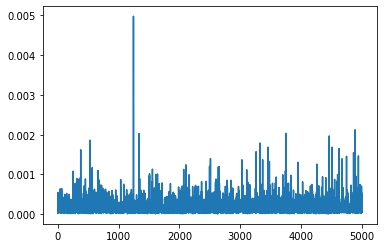

In [542]:
plt.plot(prob_record)

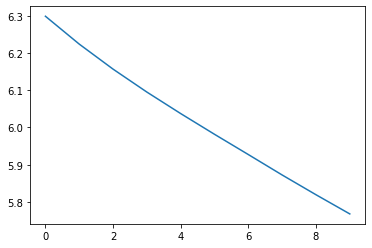

In [265]:
plt.plot(valid_prob_record)

In [458]:
from collections import Counter
total_word_flatten = [word for sentence in corpus for word in sentence]

word_counter = Counter(total_word_flatten)

In [459]:
num_total_word = len(total_word_flatten)

In [460]:
word_counter['the']

3628

In [461]:
def get_subsampling_prob(word):
  z = word_counter[word] / num_total_word
  return ((z/0.001) ** 0.5 +1) * 0.001/z

In [534]:
test = torch.rand(5)

In [464]:
compensated_length = sum([x**(3/4) for x in word_counter.values()])
compensated_length

27917.12409999141

In [465]:
import numpy as np
compensated_length = sum([x**(3/4) for x in word_counter.values()])
word_in_order = list(word_counter.keys())
prob_distribution = np.asarray([x**(3/4)/compensated_length for x in word_counter.values()])

In [466]:
prob_distribution

array([7.36704526e-03, 1.08998878e-03, 1.03856947e-02, ...,
       3.58203086e-05, 3.58203086e-05, 3.58203086e-05])

In [477]:
random_word = np.random.choice(word_in_order, 10**6, replace=True, p=prob_distribution)

In [496]:
import time

time_a = time.time()
for i in range(1000):
#   np.random.choice(word_in_order, 10, replace=False, p=prob_distribution)
  np.random.randint(10**6, size=10)
time.time() - time_a

0.006543397903442383

In [488]:
np.random.randint(10**6, size=10)

array([877389, 331913, 840560, 157725, 592713, 789341, 537875, 587140,
       940560, 839806])

In [533]:
num_vocab = len(word_to_idx_dict)
dim_emb = 50

entire_words = get_entire_words(corpus)
word_to_idx_dict = word_to_idx(entire_words)
num_vocab = len(word_to_idx_dict)

word_u_mat = torch.rand(num_vocab, dim_emb)-0.5
word_v_mat = torch.rand(num_vocab, dim_emb)-0.5

word_u_mat.requires_grad=True
word_v_mat.requires_grad=True

pair_list = make_word_pair(corpus)
random.shuffle(pair_list)
lr = 0.01

prob_record = []
valid_prob_record = []
for i in tqdm(range(10)):
  random.shuffle(pair_list)
  total_log_prob = 0
  for pair in pair_list:
    valid_prob = get_subsampling_prob(pair[0])
    if random.random() > valid_prob:
      continue
    center_word = word_to_idx_dict[pair[0]]
    window_word = word_to_idx_dict[pair[1]]
    
#     negative_word_string = np.random.choice(word_in_order, 10, replace=False, p=prob_distribution)
    negative_word_string = random_word[np.random.randint(10**6, size=10)]
    negative_word = [word_to_idx_dict[x] for x in negative_word_string] 

    center_vec = word_v_mat[center_word]
    window_vec = word_u_mat[[window_word] + negative_word]
#     negative_vec = word_u_mat[negative_word]

# #     dot_product = (center_vec * window_vec).sum()
# #     prob = 1 / (1+torch.exp(-dot_product))
    prob = torch.sigmoid(torch.matmul(center_vec, window_vec.T))
    log_prob = -torch.log(prob[0]+1e-7) -torch.log(1-prob[1:]).mean()
#     log_prob = -torch.log(prob+1e-7).mean()
    
# #     negative_product = (center_vec * negative_vec).sum(dim=-1)
# #     negative_prob = 1 - 1 / (1+torch.exp(-negative_product))
#     negative_prob = torch.sigmoid(torch.matmul(center_vec, negative_vec.T))
#     negative_log_prob = -torch.log(negative_prob+1e-7)
    
    
    
    
#     log_prob += negative_log_prob.mean()
    
    total_log_prob += log_prob.item()
    log_prob.backward()
    
    u_idx = list(set(negative_word + [window_word]))
    word_u_mat.data[u_idx] -= word_u_mat.grad[u_idx] * lr
    word_v_mat.data[center_word] -= word_v_mat.grad[center_word] * lr

#     word_u_mat.grad = None
#     word_v_mat.grad = None

    prob_record.append(prob[0].item())
  valid_prob_record.append(total_log_prob/len(pair_list))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:12<00:00, 85.24s/it]


In [525]:
torch.matmul(center_vec, window_vec)

tensor(0.4654, grad_fn=<DotBackward0>)

In [516]:
word_v_mat.grad[center_word]

tensor([ 0.0340, -0.3588,  0.0302, -0.1230,  0.1131,  0.0299, -0.0923,  0.1989,
         0.2420, -0.0702, -0.2119, -0.1785, -0.1178,  0.0235,  0.0574,  0.2094,
         0.0207, -0.0889, -0.0707, -0.1035,  0.1760, -0.0169,  0.1905,  0.2550,
        -0.0318, -0.2882, -0.1561,  0.3068,  0.1412,  0.2466,  0.2190,  0.2446,
        -0.2212,  0.2536,  0.1932, -0.0166, -0.2372, -0.2097, -0.0189,  0.1127,
         0.1202,  0.2240, -0.1238, -0.2353, -0.2771, -0.0720, -0.0528,  0.2417,
         0.1722,  0.1823])

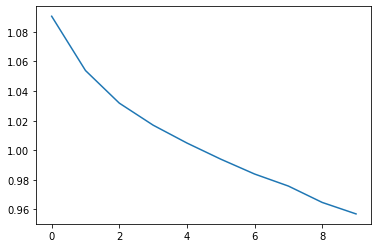

In [480]:
plt.plot(valid_prob_record)

In [481]:
word_vec = (word_v_mat+word_u_mat) / 2

In [535]:
word_vec = (word_v_mat+word_u_mat) / 2
import pprint as pp
class Word2Vec:
  def __init__(self, vectors, unique_words):
    self.vec = vectors
    self.vocab = unique_words
    self.wrd2idx = word_to_idx(unique_words)
    self.idx2wrd = {i:x for i, x in enumerate(unique_words)}
  
  def most_similar(self, wrd):
    assert wrd in self.vocab, f"{wrd} is not included in the vocab"
    wrd_vec = self.vec[self.wrd2idx[wrd]]
    similarity = torch.nn.functional.cosine_similarity(wrd_vec, self.vec)
    similarity[self.wrd2idx[wrd]] = 0
    value, index = torch.sort(similarity, descending=True)
    pp.pprint([(model.idx2wrd[index[i].item()], value[i].item()) for i in range(10)])
    
  def _cal_entire_dot_product(self, vec):
    return torch.matmul(vec, self.vec.T)

model = Word2Vec(word_vec, entire_words)
sim = model.most_similar('dumbledore')

[('reached', nan),
 ('rear', nan),
 ('really', nan),
 ('realizing', nan),
 ('realized', nan),
 ('realize', nan),
 ('real', nan),
 ('ready', nan),
 ('reading', nan),
 ('readin', nan)]


In [199]:
value, index = torch.sort(sim, descending=True)
[(model.idx2wrd[index[i].item()], value[i]) for i in range(10)]

[('mahler', tensor(1., grad_fn=<SelectBackward0>)),
 ('was', tensor(0.4068, grad_fn=<SelectBackward0>)),
 ('operatic', tensor(0.3925, grad_fn=<SelectBackward0>)),
 ('listeners', tensor(0.3846, grad_fn=<SelectBackward0>)),
 ('tradition', tensor(0.3803, grad_fn=<SelectBackward0>)),
 ('the', tensor(0.3685, grad_fn=<SelectBackward0>)),
 ('europe', tensor(0.3637, grad_fn=<SelectBackward0>)),
 ('early', tensor(0.3515, grad_fn=<SelectBackward0>)),
 ('displayed', tensor(0.3508, grad_fn=<SelectBackward0>)),
 ('gifts', tensor(0.3460, grad_fn=<SelectBackward0>))]

tensor([ 1.0000e+00,  4.0679e-01,  3.9248e-01,  3.8456e-01,  3.8025e-01,
         3.6855e-01,  3.6373e-01,  3.5147e-01,  3.5083e-01,  3.4598e-01,
         3.3482e-01,  3.3314e-01,  3.2719e-01,  3.2509e-01,  3.1455e-01,
         3.1331e-01,  3.1159e-01,  3.0863e-01,  3.0150e-01,  3.0107e-01,
         3.0041e-01,  3.0008e-01,  2.9283e-01,  2.9116e-01,  2.7639e-01,
         2.7156e-01,  2.7134e-01,  2.6538e-01,  2.6165e-01,  2.5717e-01,
         2.5558e-01,  2.5439e-01,  2.5354e-01,  2.5061e-01,  2.5009e-01,
         2.4996e-01,  2.4985e-01,  2.4658e-01,  2.4237e-01,  2.3933e-01,
         2.2526e-01,  2.2117e-01,  2.2106e-01,  2.1418e-01,  2.1331e-01,
         2.1324e-01,  2.1311e-01,  2.1282e-01,  2.1158e-01,  2.1150e-01,
         2.0905e-01,  1.8952e-01,  1.8637e-01,  1.8114e-01,  1.7889e-01,
         1.7731e-01,  1.7645e-01,  1.7624e-01,  1.7401e-01,  1.7293e-01,
         1.6957e-01,  1.6786e-01,  1.6608e-01,  1.6600e-01,  1.6026e-01,
         1.5750e-01,  1.5586e-01,  1.5428e-01,  1.5

In [192]:
value

tensor([-4.3392e-01, -4.0375e-01, -4.0030e-01, -3.5334e-01, -3.3877e-01,
        -3.1901e-01, -2.8927e-01, -2.8007e-01, -2.7752e-01, -2.7128e-01,
        -2.6967e-01, -2.6928e-01, -2.4605e-01, -2.3967e-01, -2.3293e-01,
        -2.2725e-01, -2.1992e-01, -2.0834e-01, -2.0276e-01, -1.9622e-01,
        -1.9430e-01, -1.9316e-01, -1.9198e-01, -1.9119e-01, -1.9041e-01,
        -1.8986e-01, -1.8777e-01, -1.8614e-01, -1.8350e-01, -1.8206e-01,
        -1.8198e-01, -1.8082e-01, -1.7679e-01, -1.7555e-01, -1.7010e-01,
        -1.6767e-01, -1.6531e-01, -1.5938e-01, -1.5900e-01, -1.5740e-01,
        -1.5334e-01, -1.5227e-01, -1.4502e-01, -1.4365e-01, -1.4091e-01,
        -1.4046e-01, -1.2574e-01, -1.2572e-01, -1.2465e-01, -1.2079e-01,
        -1.1979e-01, -1.1693e-01, -1.1394e-01, -1.1101e-01, -1.1008e-01,
        -1.0845e-01, -1.0371e-01, -9.8959e-02, -9.6623e-02, -9.6136e-02,
        -9.2172e-02, -8.9852e-02, -8.8152e-02, -8.3982e-02, -7.9470e-02,
        -7.6836e-02, -7.2486e-02, -7.0835e-02, -6.7

In [185]:
torch.CosineSimilarity

AttributeError: module 'torch' has no attribute 'CosineSimilarity'

In [162]:
word_v_mat.gr

tensor([-0.2413,  0.2464, -0.4396, -0.2109, -0.1728, -0.0310,  0.1987, -0.0050,
        -0.0709, -0.4284,  0.3129, -0.2714,  0.4896,  0.4703,  0.0808,  0.0236,
        -0.2900, -0.2431,  0.4144, -0.2510, -0.1350, -0.0822, -0.0416, -0.3595,
         0.3859,  0.1118,  0.3723, -0.1724, -0.1682,  0.1996],
       grad_fn=<SelectBackward0>)

In [138]:
1/240

0.004166666666666667

torch.nn.modules.distance.CosineSimilarity

In [ ]:
likelihood = 1
for word_position_t in sentence:
  center_word = get_word_by_position(word_position_t)
  for relative_position_j in range(-window_size_m, window_size_m+1):
    context_word = get_word_by_position(word_position_t + relative_position_j)
    probability = get_probability(model_theta, center_word, context_word)
    likelihood *= probability

In [38]:
list(range(-4,4))

[-4, -3, -2, -1, 0, 1, 2, 3]

In [594]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=2, workers=4, epochs=30, negative=20)

In [595]:
model.wv.most_similar('harry')

[('ron', 0.7032079100608826),
 ('neville', 0.6670065522193909),
 ('he', 0.6632313132286072),
 ('hermione', 0.5578097105026245),
 ('card', 0.5433615446090698),
 ('himself', 0.519416332244873),
 ('finally', 0.5083684921264648),
 ('malfoy', 0.499571293592453),
 ('furiously', 0.4791777729988098),
 ('casually', 0.4733937382698059)]

In [408]:
??Word2Vec